# Description
- Melakukan kompresi gambar menggunakan metode unsupervised, yaitu KMeans Clustering.
- Clustering adalah salah satu model machine learning unsupervised yang dimana model ini berusaha mengelompokkan kumpulan data menjadi beberapa kelompok dengan memperimbangkan karakteristik dari setiap data.
- Clustering memaksimalkan kesamaan setiap karakteristik datapoint dan juga memaksimalkan perbedaan dari setiap karakteristik datapoint.
- Untuk KMeans Clustering cara kerjanya, yaitu tentukan terlebih dahulu jumlah centroid/cluster, selanjutnya akan dilakukan iterasi sebanyak n untuk setiap datapoint terhadap centroid/cluster. Setiap datapoint dan cluster akan dihitung jaraknya dengan menggunakan Euclidean Distance. Datapoint dengan jarak terdekat dengan suatu centroid akan masuk ke kelompok centroid tersebut. Setelah semua datapoint selesain dihitung dan telah terkelompokkan, selanjutnya posisi centroid diubah dengan menggunakan mean dari centroid. Akan dilakukan sekian iterasi sampai sudah tidak ada perubahan signifikan datapoint terhadap centroid.

# Import Modules

In [1]:
import os
import cv2
import random
import numpy as np
import numpy.matlib
import seaborn as sns
import matplotlib.pyplot as plt

from skimage import io

##### Keterangan module:
- os : menyediakan fungsi untuk berinteraksi dengan sistem operasi.
- cv2 : untuk melakukan operasi manipulasi gambar.
- random : untuk melakukan random pada serangkaian data.
- numpy : untuk melakukan operasi vektor dan matriks
- matplotlib : untuk visualisasi
- skimage : untuk melakukan operasi terkait dengan gambar, seperti read dan write image.

# Show original image

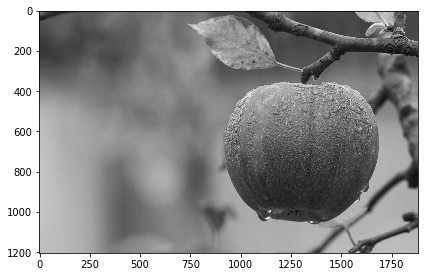

In [2]:
original_image = io.imread('../images/before-compression/apple.jpeg')

io.imshow(original_image)
io.show()

# Show Histogram

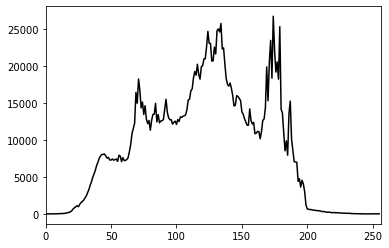

In [3]:
for i, col in enumerate(['black']):
    hist = cv2.calcHist([original_image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])

# Get width and length from image

In [4]:
length         = original_image.shape[0]
width          = original_image.shape[1]
original_image = original_image / 255

X = original_image.reshape(original_image.shape[0] * original_image.shape[1], 1)

Karena setiap pixel pada gambar merupakan sebuah fitur, maka jumlah fitur adalah length * width dari gambar.

# Keterangan untuk setiap function built-in yang digunakan:
- np.zeros untuk membuat matriks berisi nol dengan ukuran yang telah ditentukan.
- np.empty untuk membuat matriks kosong sesuai dengan ukuran yang ditentukan.
- np.ones untuk membuat matriks berisi 1 dengan ukuran yang telah ditentukan.
- np.power untuk melakukan operasi perpangkatan untuk setiap isi pada matriks.
- np.subtract untuk melalukan operasi pengurangan pada matriks.
- np.sum untuk melakukan operasi penjumlahan pada matriks.
- np.asarray untuk menyimpan sebuah nilai ke dalam bentuk matriks dengan dimensi tertentu.
- rezise untuk mengubah dimensi dari matriks.
- np.size untuk mengambil ukuran dari matriks.
- np.append untuk melakukan assign suatu nilai ke varible bertipe matriks.
- np.delete untuk melakukan delete item atau nilai tertentu pada sebuah matriks.
- np.argmin untuk mengembalikan indeks dari nilai minimum sepanjang sumbu pada matriks.
- np.matlib.repmat untuk mengulangi nilai dari matriks 0-D hingga 2-D atau matriks M*N.
- np.transpose untuk melakukan transpose matriks, membalik posisi nilai-nilai pada matriks menjadi kolom ke baris atau sebaliknya.
- np.multiply untuk melakukan operasi perkalian antar nilai pada matriks.
- np.reshape untuk mengubah bentuk matriks ke bentuk baru tanpa mengubah data.

# Determine Cluster and Max Iteration

In [5]:
number_of_cluster = 16
max_iters         = 300

# Function Initialize centroid

In [6]:
def init_centroids(X, number_of_clusters):
    c = random.sample(list(X), number_of_clusters)
    
    return c

Fungsi di atas akan melakukan initialisasi centroid terdahap keseluruhan datapoint, dalam hal ini pixel pada gambar.

# Determine closest centroid for each datapoint (pixel)

In [7]:
def closest_centroids(X, c):
    number_of_cluster = np.size(c, 0)
    idx               = np.zeros((np.size(X,0), 1))
    arr               = np.empty((np.size(X,0), 1))
    
    for i in range(0, number_of_cluster):
        y    = c[i]
        temp = np.ones((np.size(X, 0), 1)) * y
        b    = np.power(np.subtract(X, temp), 2)
        a    = np.sum(b, axis = 1)
        a    = np.asarray(a)
        
        a.resize((np.size(X, 0), 1))
        arr  = np.append(arr, a, axis=1)
        
    arr = np.delete(arr, 0, axis=1)
    idx = np.argmin(arr, axis=1)
    
    return idx

Fungsi di atas melakukan proses penentuan centroid yang paling optimum untuk setiap datapoint (piksel). Akan dilakukan sejumlah iterasi, sampai tidak ada lagi perubahan posisi yang signifikan untuk setiap piksel terhadap centroid.

# Compute Centroids

In [8]:
def compute_centroids(X, idx, number_of_cluster):
    n         = np.size(X, 1)
    centroids = np.zeros((number_of_cluster, n))
    
    for i in range(0, number_of_cluster):
        ci           = idx == i
        ci           = ci.astype(int)
        total_number = sum(ci)
        
        ci.resize((np.size(X,0),1))
        
        total_matrix = np.matlib.repmat(ci, 1, n)
        ci           = np.transpose(ci)
        total        = np.multiply(X, total_matrix)
        centroids[i] = (1 / total_number) * np.sum(total, axis=0)
        
    return centroids

Fungsi di atas mengambil jumlah centroid akhir dari matriks transpose.

# KMeans Clustering

In [9]:
def run_kMean(X, initial_centroids, max_iters):
    m                  = np.size(X, 0)
    n                  = np.size(X, 1)
    number_of_cluster  = np.size(initial_centroids, 0)
    centroids          = initial_centroids
    previous_centroids = centroids
    idx                = np.zeros((m, 1))
    
    for i in range(1, max_iters):
        idx = closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, number_of_cluster)
        
    return centroids, idx

Funsgi di atas melakukan prediksi clustering berdasarkan hasil kalkulasi dari centroid yang telah ditentukan sebelumnya. Setiap datapoint (piksel) akan di diberikan tanda piksel tersebut masuk ke cluster yang mana. Pemberian nilai cluster dalam rentang 0 sampai n_clsuter-1.

# Result after run function init centroids and KMeans

In [10]:
initial_centroids = init_centroids(X, number_of_cluster)
centroids, idx    = run_kMean(X, initial_centroids, max_iters)

print(np.shape(centroids))
print(np.shape(idx))

(16, 1)
(2263520,)


# Save value after compression

In [11]:
idx         = closest_centroids(X, centroids)
X_recovered = centroids[idx]
X_recovered = np.reshape(X_recovered, (length, width, 1))

print(np.shape(X_recovered))

(1204, 1880, 1)


# Show image compressed

In [12]:
image_compressed = io.imsave('../images/after-compression/apple/images/apple-16-cluster-compressed.jpeg', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


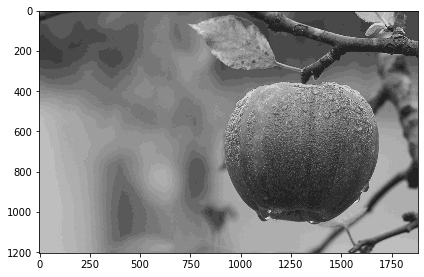

In [13]:
image_compressed = io.imread('../images/after-compression/apple/images/apple-16-cluster-compressed.jpeg')

io.imshow(image_compressed)
io.show()

# Show Histogram

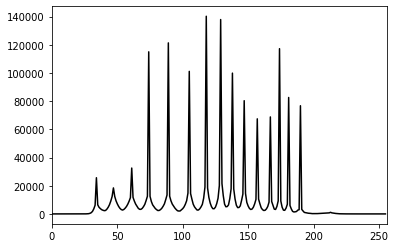

In [14]:
for i, col in enumerate(['black']):
    hist = cv2.calcHist([image_compressed], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])

# Image size before and after compression with KMeans

In [15]:
size_before_compression = os.stat('../images/before-compression/apple.jpeg')
size_after_compression = os.stat('../images/after-compression/apple/images/apple-16-cluster-compressed.jpeg')

print("Size of image before running K-mean algorithm: ", size_before_compression.st_size / 1024,"KB")
print("Size of image after running K-mean algorithm: ", size_after_compression.st_size / 1024,"KB")

Size of image before running K-mean algorithm:  147.50390625 KB
Size of image after running K-mean algorithm:  162.787109375 KB
